##### Problem Satatement

To create a classification model that can effectively classify customers as satisfied or dissatisfied based on the provided features. By solving this problem, airlines can gain valuable insights into the factors that impact customer satisfaction and make informed decisions to enhance their services and overall customer experience.

##### Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve

##### Read the data

In [3]:
#loading the data
data = pd.read_csv('Airlines_dataset.csv')

#top five observations
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Average,Easy,Good,Very Poor,Good,Excellent,Good,Average,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Average,Easy,Very Good,Very Good,Very Good,Average,Good,Average,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Average,Average,Good,Good,Very Good,Very Good,Very Good,Average,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Good,Difficult,Poor,Very Poor,Poor,Very Good,Poor,Good,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Very Good,Average,Average,Very Poor,Average,Very Good,Average,Excellent,0,0.0


##### Data Preprocessing

In [4]:
#shape of the data
data.shape

(129880, 23)

In [5]:
#data types the columns
data.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                          object
Departure/Arrival time convenient     object
Food and drink                        object
Gate location                         object
Inflight wifi service                 object
Inflight entertainment                object
Online support                        object
Ease of Online booking                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Cleanliness                           object
Online boarding                       object
Departure Delay in Minutes             int64
Arrival De

In [6]:
#null values
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are about 393 standard null values in 'Arrival Delay in minutes' feature.

In [7]:
# Non Standarad null values
data.replace(' ', np.NaN, inplace= True)

In [8]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are no Non Standarad Null values

In [9]:
#filling null values with the median
median_value = data['Arrival Delay in Minutes'].median()
data['Arrival Delay in Minutes'].fillna(median_value, inplace=True)

In [10]:
data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
#Outliers
#q1, q3 quantiles
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#Inter Quantile Range
IQR = q3-q1

#upperlimit
ul = q3+(IQR*1.5)
#lower limit
ll = q1-(IQR*1.5)

In [12]:
#count of outliers
print(data[data>ul].count())
print(data[data<ll].count())

satisfaction                             0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                       2581
Seat comfort                             0
Departure/Arrival time convenient        0
Food and drink                           0
Gate location                            0
Inflight wifi service                    0
Inflight entertainment                   0
Online support                           0
Ease of Online booking                   0
On-board service                         0
Leg room service                         0
Baggage handling                         0
Checkin service                          0
Cleanliness                              0
Online boarding                          0
Departure Delay in Minutes           18098
Arrival Delay in Minutes             17492
dtype: int6

In [13]:
# Calculate the median value
median_Flight_Distance = data['Flight Distance'].median()
median_Departure_Delay_in_Minutes = data['Departure Delay in Minutes'].median()
median_Arrival_Delay_in_Minutes = data['Arrival Delay in Minutes'].median()

# Replace values above the upper limit with the median value
data.loc[data['Flight Distance'] > ul['Flight Distance'], 'Flight Distance'] = median_Flight_Distance
data.loc[data['Departure Delay in Minutes'] > ul['Departure Delay in Minutes'], 'Departure Delay in Minutes'] = median_Departure_Delay_in_Minutes
data.loc[data['Arrival Delay in Minutes'] > ul['Arrival Delay in Minutes'], 'Arrival Delay in Minutes'] = median_Arrival_Delay_in_Minutes

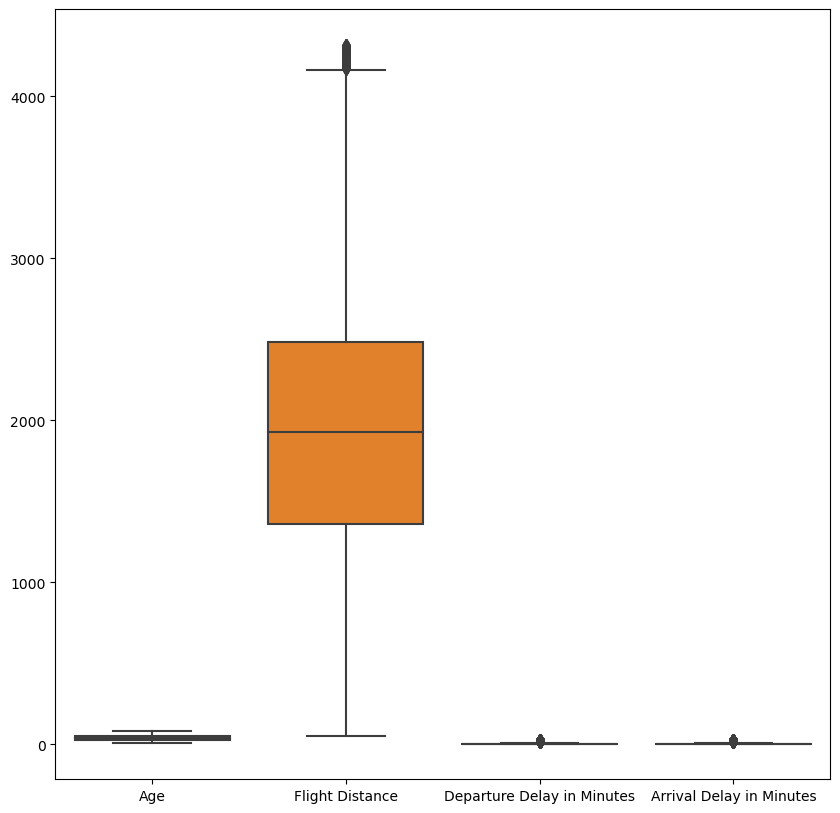

In [14]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(data=data)
plt.show()

##### Measures Of Central Tendency

In [15]:
#Calculating the Mean
mean_data = data.mean()
mean_data

Age                             39.427957
Flight Distance               1922.151370
Departure Delay in Minutes       3.200477
Arrival Delay in Minutes         3.532345
dtype: float64

In [16]:
#calculating the median
median_data = data.median()
median_data

Age                             40.0
Flight Distance               1925.0
Departure Delay in Minutes       0.0
Arrival Delay in Minutes         0.0
dtype: float64

In [17]:
#calculating the mode
mode_data = data.mode()
mode_data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,39,Business travel,Business,1925,Comfortable,Very Convenient,Good,...,Very Good,Very Easy,Very Good,Very Good,Very Good,Very Good,Very Good,Very Good,0,0.0


##### Summary Report of Measures of Central Tendancy

##### Measures of Dispersion 

In [18]:
#calculating the Range
# Select only the integer and float type columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the range for each numeric column
range_data = numeric_columns.max() - numeric_columns.min()

# Display the range for each numeric column
range_data

Age                             78.0
Flight Distance               4271.0
Departure Delay in Minutes      30.0
Arrival Delay in Minutes        32.0
dtype: float64

In [19]:
#calculating the variance
var_data = numeric_columns.var()
var_data

Age                              228.595045
Flight Distance               877239.739265
Departure Delay in Minutes        44.485529
Arrival Delay in Minutes          51.134857
dtype: float64

In [20]:
#calculating the standard deviation
st_dev_data = numeric_columns.std()
st_dev_data

Age                            15.119360
Flight Distance               936.610773
Departure Delay in Minutes      6.669747
Arrival Delay in Minutes        7.150864
dtype: float64

##### Summary report on Measures of Dispersion

##### Exploratory Data Analysis

##### Univariate Anlysis

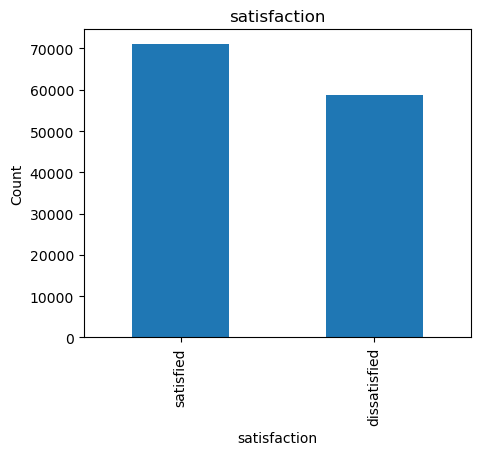

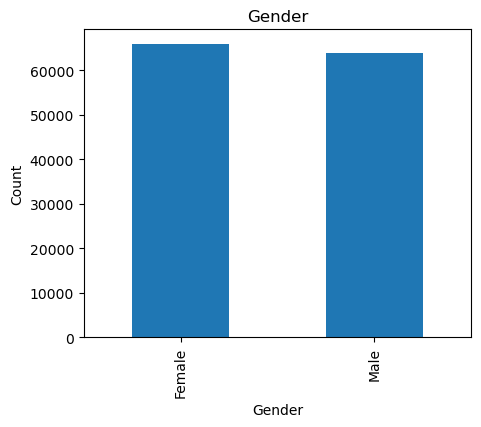

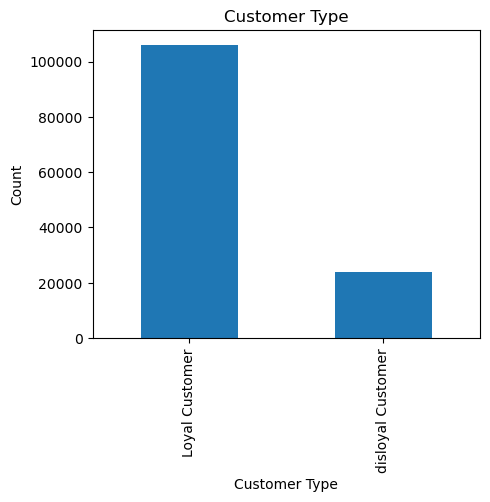

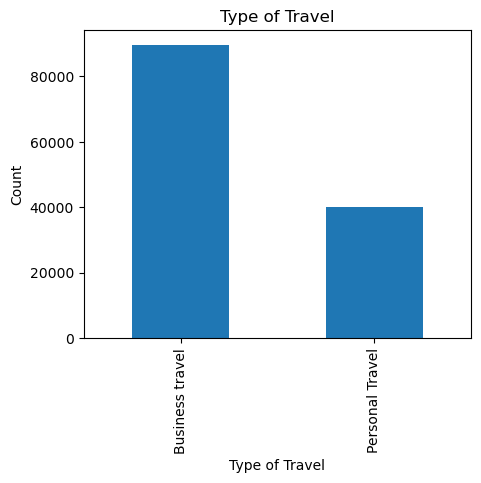

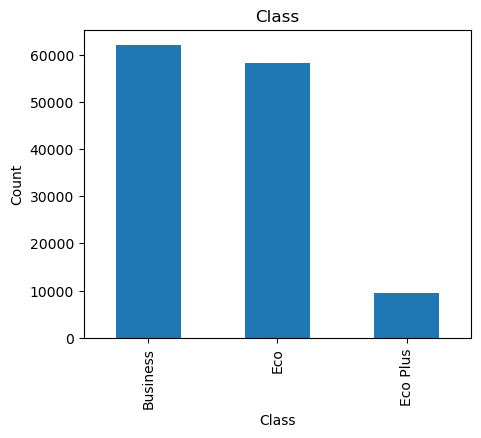

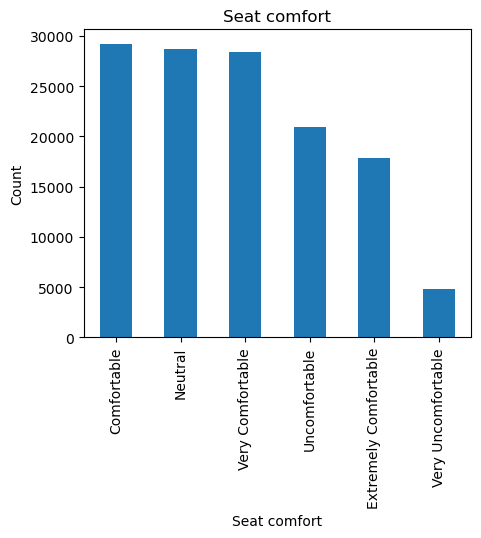

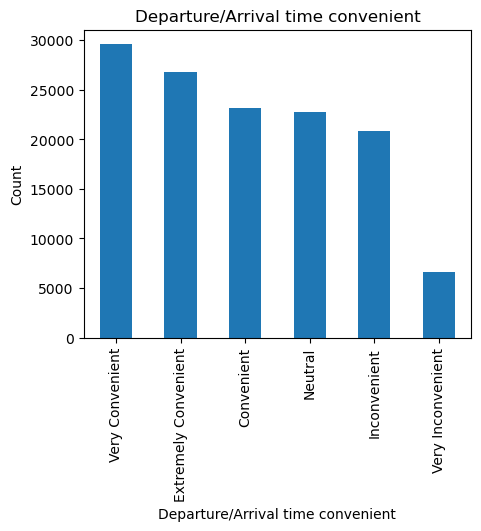

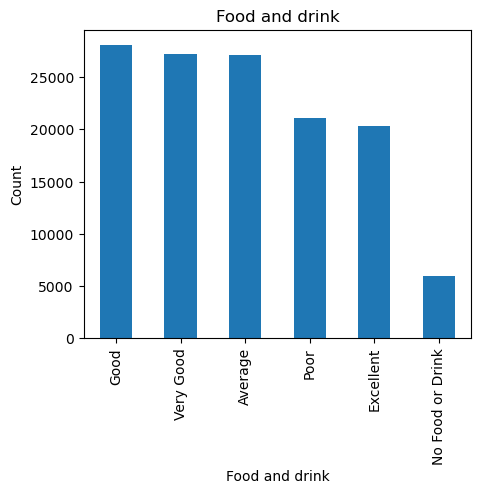

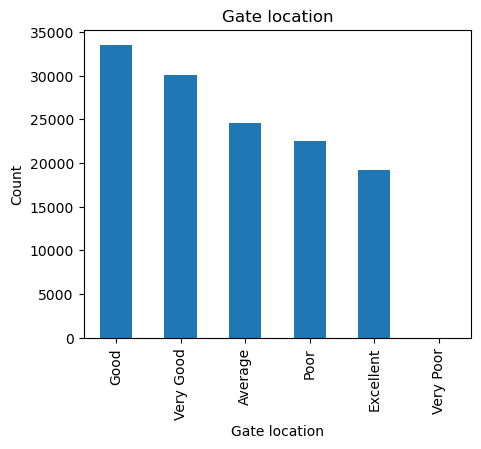

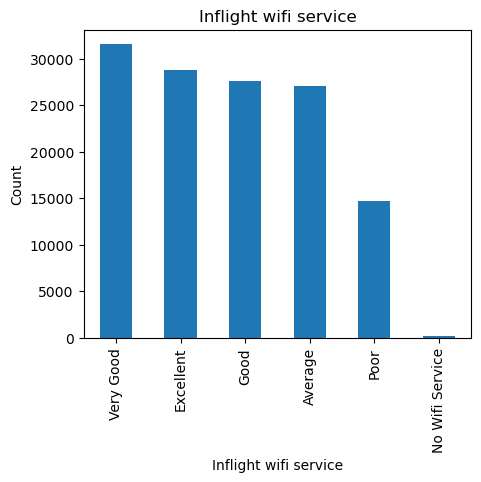

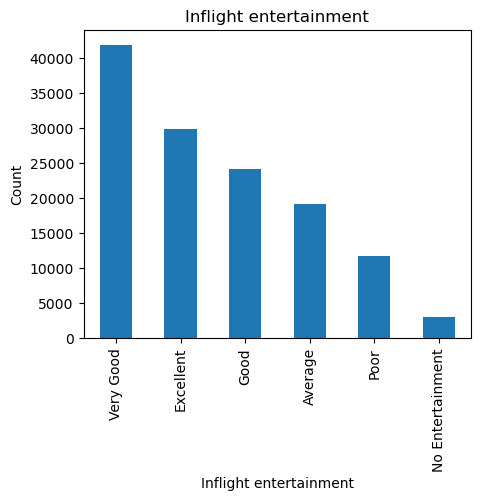

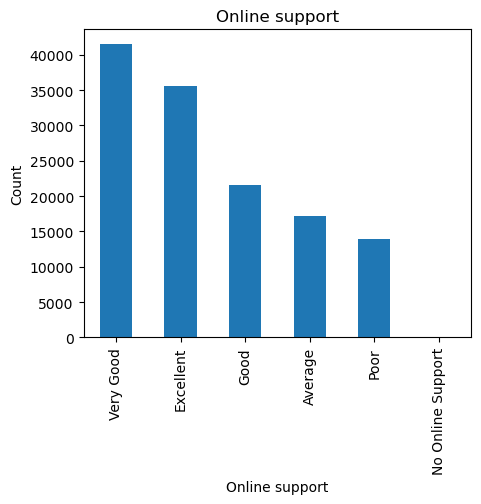

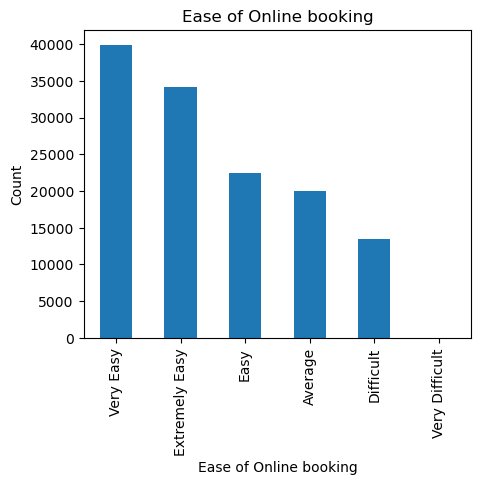

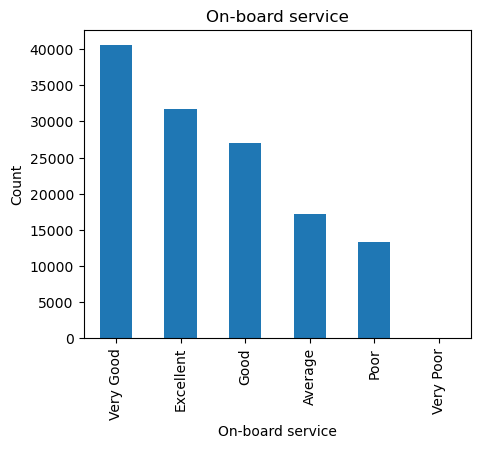

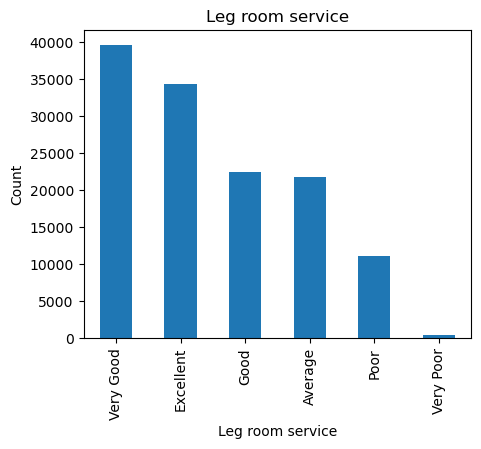

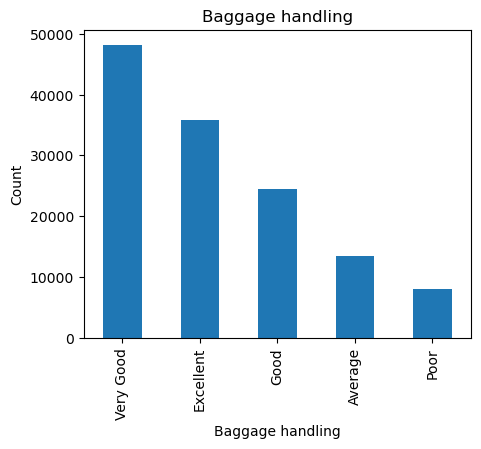

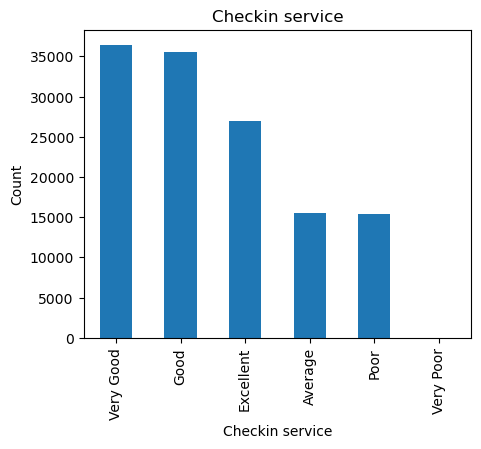

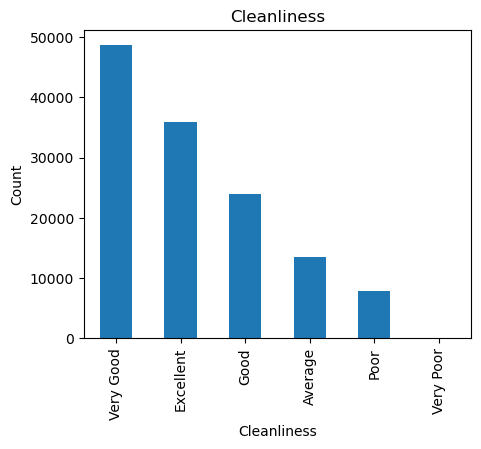

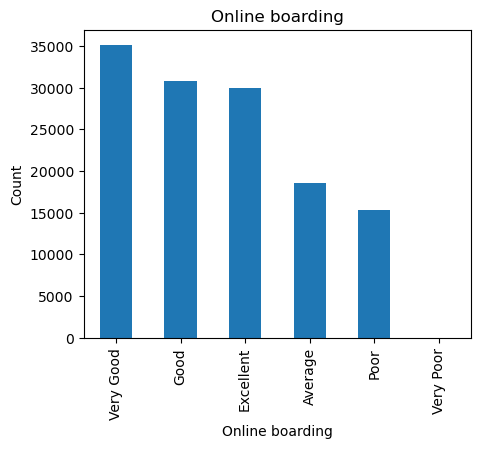

In [21]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object'])

# Plot bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(5, 4))
    data[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [22]:
#frequency table for Satisfaction feature
satisfaction_frequency_table = data['satisfaction'].value_counts()
satisfaction_frequency_table

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

out of 129880 customers, overall satisfied are 71087 and 58793 atre dissatisfied

In [23]:
#frequency table for gender feature
Gender_frequency_table = data['Gender'].value_counts()
Gender_frequency_table

Female    65899
Male      63981
Name: Gender, dtype: int64

out of 129880 customers, 65899 are Female and 63981 are Male

In [24]:
#frequency table for CustomerType feature
customerType_frequency_table = data['Customer Type'].value_counts()
customerType_frequency_table

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

out of 129880 customers, 106100 are Loyal Customers and 23780 are disloyal Customers

In [25]:
#frequency table for Type of Travel feature
TypeofTravel_frequency_table = data['Type of Travel'].value_counts()
TypeofTravel_frequency_table

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [26]:
#frequency table for class feature
class_frequency_table = data['Class'].value_counts()
class_frequency_table

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [27]:
#frequency table for seat comfort feature
SeatComfort_frequency_table = data['Seat comfort'].value_counts()
SeatComfort_frequency_table

Comfortable              29183
Neutral                  28726
Very Comfortable         28398
Uncomfortable            20949
Extremely Comfortable    17827
Very Uncomfortable        4797
Name: Seat comfort, dtype: int64

In [28]:
#frequency table for Departure/Arrival time convenient feature
Departure_Arrival_time_convenient_frequency_table = data['Departure/Arrival time convenient'].value_counts()
Departure_Arrival_time_convenient_frequency_table

Very Convenient         29593
Extremely Convenient    26817
Convenient              23184
Neutral                 22794
Inconvenient            20828
Very Inconvenient        6664
Name: Departure/Arrival time convenient, dtype: int64

In [29]:
#frequency table for Food and drink feature
Food_and_drink_frequency_table = data['Food and drink'].value_counts()
Food_and_drink_frequency_table

Good                28150
Very Good           27216
Average             27146
Poor                21076
Excellent           20347
No Food or Drink     5945
Name: Food and drink, dtype: int64

In [30]:
#frequency table for Gate location feature
Gate_location_frequency_table = data['Gate location'].value_counts()
Gate_location_frequency_table

Good         33546
Very Good    30088
Average      24518
Poor         22565
Excellent    19161
Very Poor        2
Name: Gate location, dtype: int64

In [31]:
#frequency table for Inflight wifi service feature
Inflight_wifi_service_frequency_table = data['Inflight wifi service'].value_counts()
Inflight_wifi_service_frequency_table

Very Good          31560
Excellent          28830
Good               27602
Average            27045
Poor               14711
No Wifi Service      132
Name: Inflight wifi service, dtype: int64

In [32]:
#frequency table for Inflight entertainment feature
Inflight_entertainment_frequency_table = data['Inflight entertainment'].value_counts()
Inflight_entertainment_frequency_table

Very Good           41879
Excellent           29831
Good                24200
Average             19183
Poor                11809
No Entertainment     2978
Name: Inflight entertainment, dtype: int64

In [33]:
#frequency table for Online support feature
Online_support_frequency_table = data['Online support'].value_counts()
Online_support_frequency_table

Very Good            41510
Excellent            35563
Good                 21609
Average              17260
Poor                 13937
No Online Support        1
Name: Online support, dtype: int64

In [34]:
#frequency table for Ease of Online booking feature
Ease_of_Online_booking_frequency_table = data['Ease of Online booking'].value_counts()
Ease_of_Online_booking_frequency_table

Very Easy         39920
Extremely Easy    34137
Easy              22418
Average           19951
Difficult         13436
Very Difficult       18
Name: Ease of Online booking, dtype: int64

In [35]:
#frequency table foR On-board service support feature
On_board_service_frequency_table = data['On-board service'].value_counts()
On_board_service_frequency_table

Very Good    40675
Excellent    31724
Good         27037
Average      17174
Poor         13265
Very Poor        5
Name: On-board service, dtype: int64

In [36]:
#frequency table for Leg room service feature
Leg_room_service_frequency_table = data['Leg room service'].value_counts()
Leg_room_service_frequency_table

Very Good    39698
Excellent    34385
Good         22467
Average      21745
Poor         11141
Very Poor      444
Name: Leg room service, dtype: int64

In [37]:
#frequency table for Baggage handling feature
Baggage_handling_frequency_table = data['Baggage handling'].value_counts()
Baggage_handling_frequency_table

Very Good    48240
Excellent    35748
Good         24485
Average      13432
Poor          7975
Name: Baggage handling, dtype: int64

In [38]:
#frequency table for Checkin service feature
Checkin_service_frequency_table = data['Checkin service'].value_counts()
Checkin_service_frequency_table

Very Good    36481
Good         35538
Excellent    27005
Average      15486
Poor         15369
Very Poor        1
Name: Checkin service, dtype: int64

In [39]:
#frequency table for Cleanliness feature
Cleanliness_frequency_table = data['Cleanliness'].value_counts()
Cleanliness_frequency_table

Very Good    48795
Excellent    35916
Good         23984
Average      13412
Poor          7768
Very Poor        5
Name: Cleanliness, dtype: int64

In [40]:
#frequency table for Online boarding feature
Online_boarding_frequency_table = data['Online boarding'].value_counts()
Online_boarding_frequency_table

Very Good    35181
Good         30780
Excellent    29973
Average      18573
Poor         15359
Very Poor       14
Name: Online boarding, dtype: int64

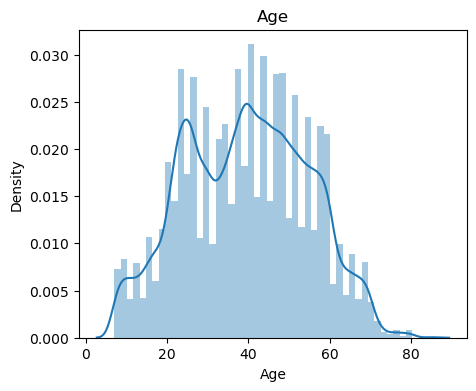

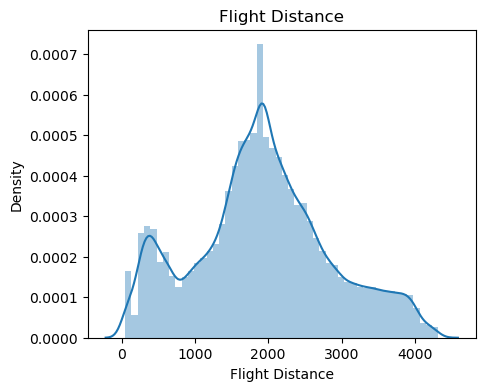

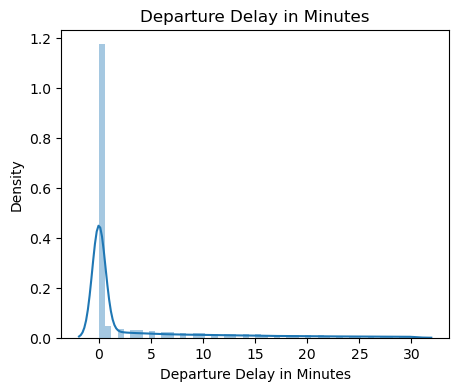

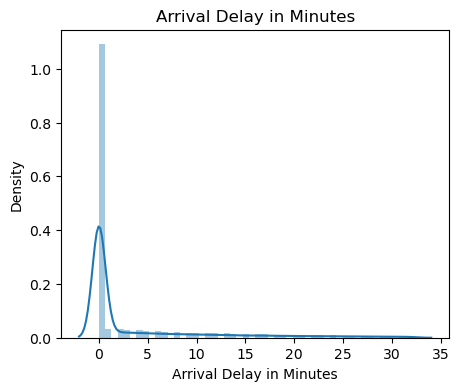

In [41]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Plot distribution plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(5, 4))
    sns.distplot(data[column])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

Age is not skewed, most of the age group lies between 20-60 years

##### BiVariate Analysis

<Figure size 500x400 with 0 Axes>

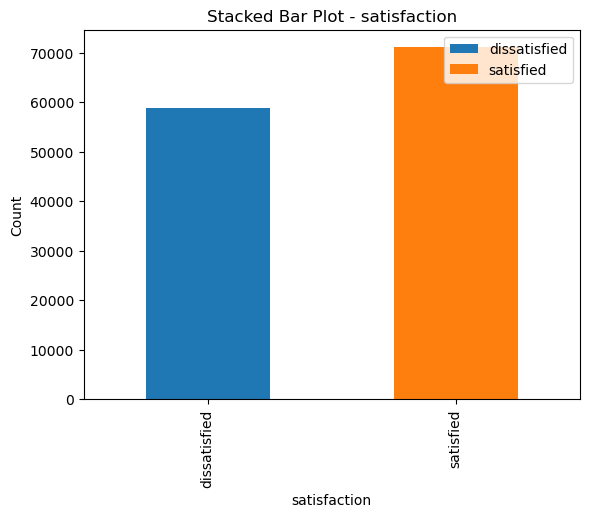

<Figure size 500x400 with 0 Axes>

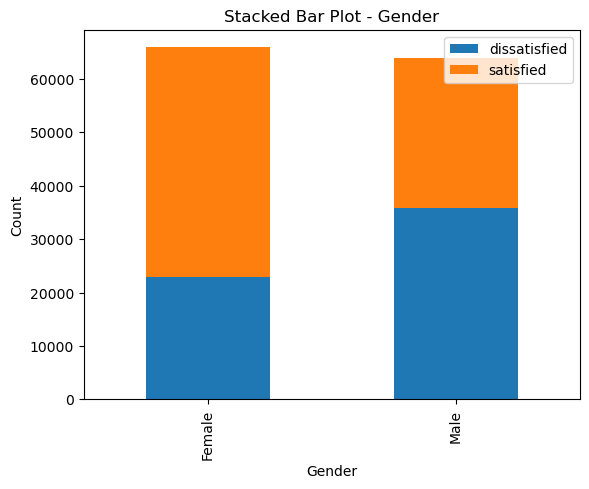

<Figure size 500x400 with 0 Axes>

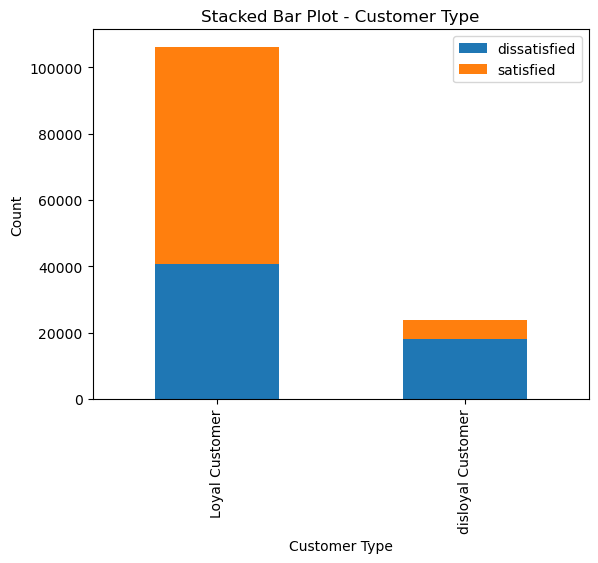

<Figure size 500x400 with 0 Axes>

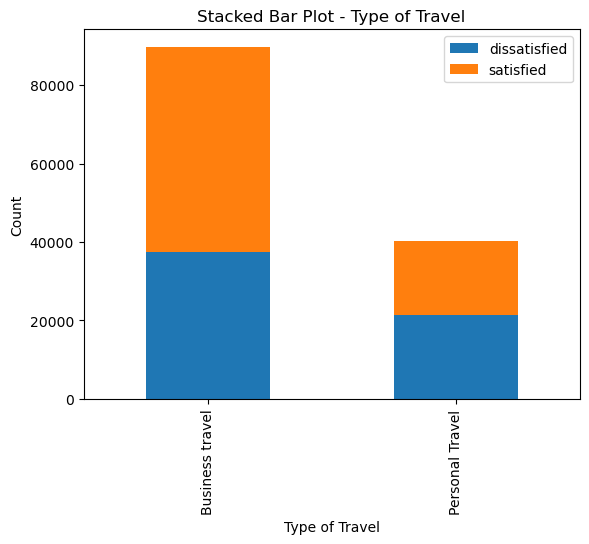

<Figure size 500x400 with 0 Axes>

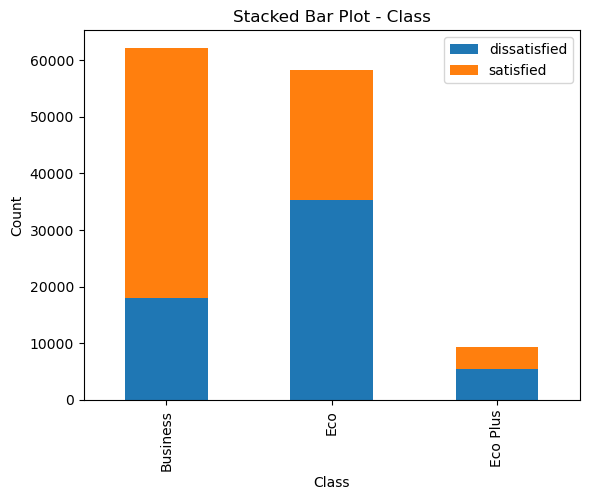

<Figure size 500x400 with 0 Axes>

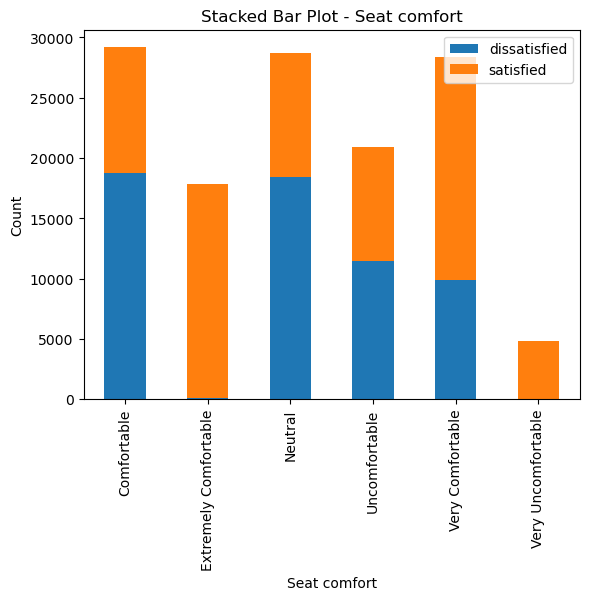

<Figure size 500x400 with 0 Axes>

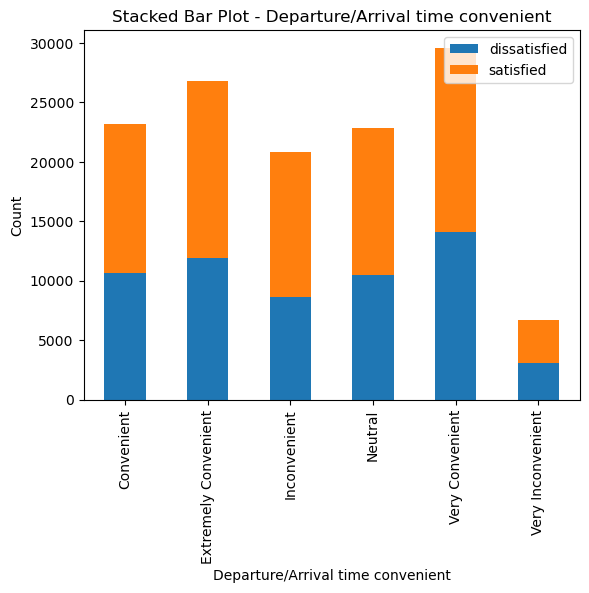

<Figure size 500x400 with 0 Axes>

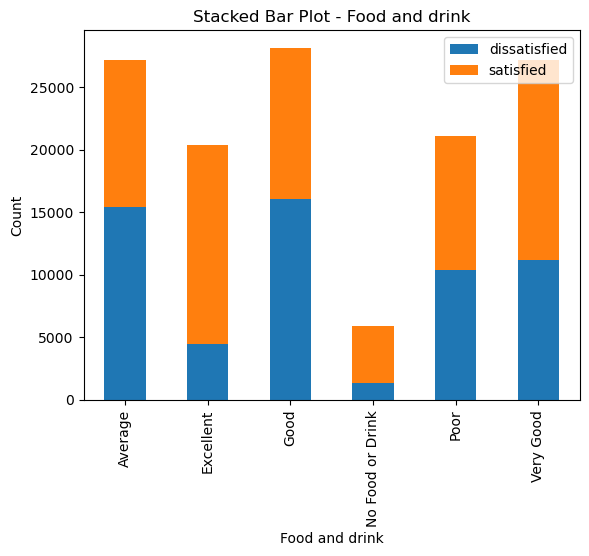

<Figure size 500x400 with 0 Axes>

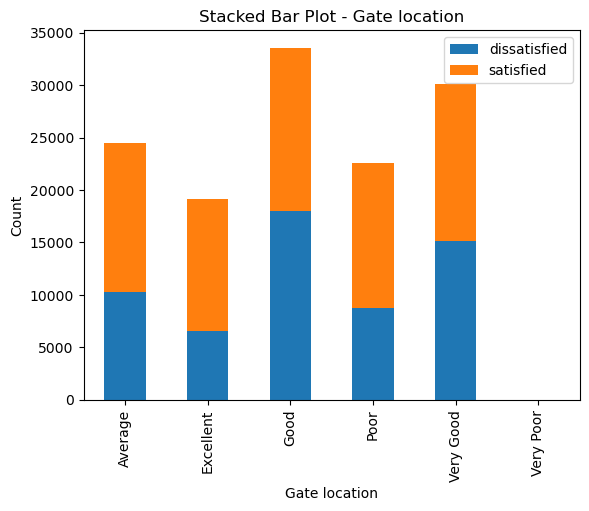

<Figure size 500x400 with 0 Axes>

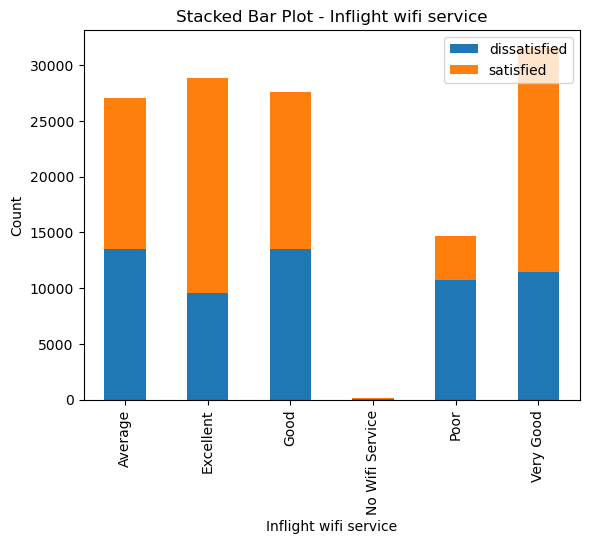

<Figure size 500x400 with 0 Axes>

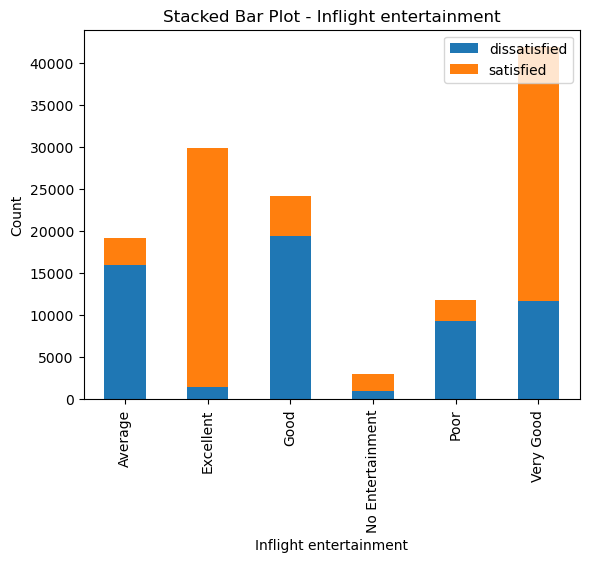

<Figure size 500x400 with 0 Axes>

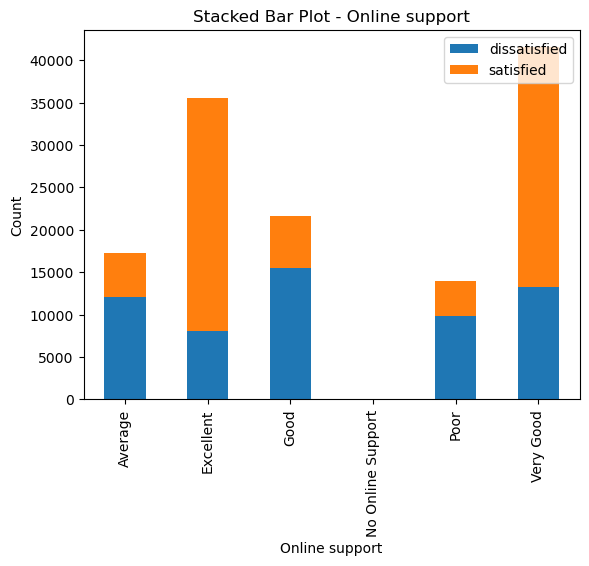

<Figure size 500x400 with 0 Axes>

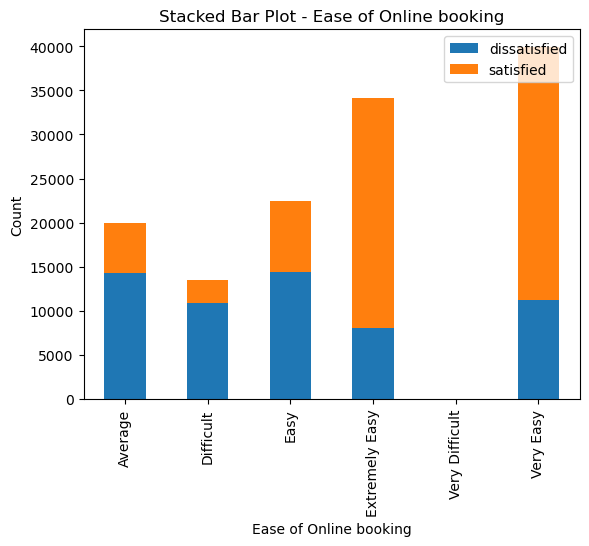

<Figure size 500x400 with 0 Axes>

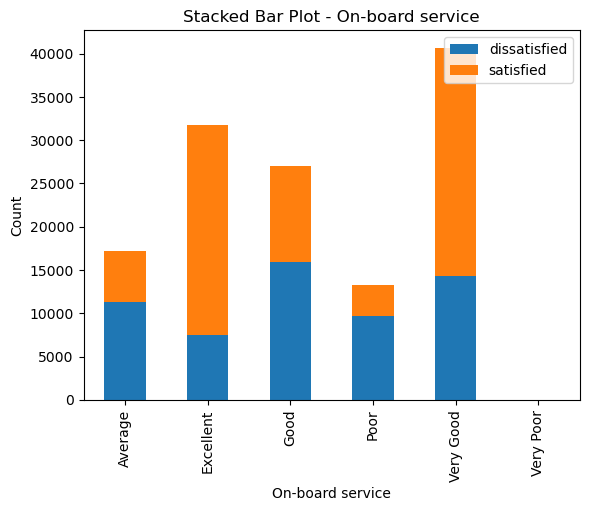

<Figure size 500x400 with 0 Axes>

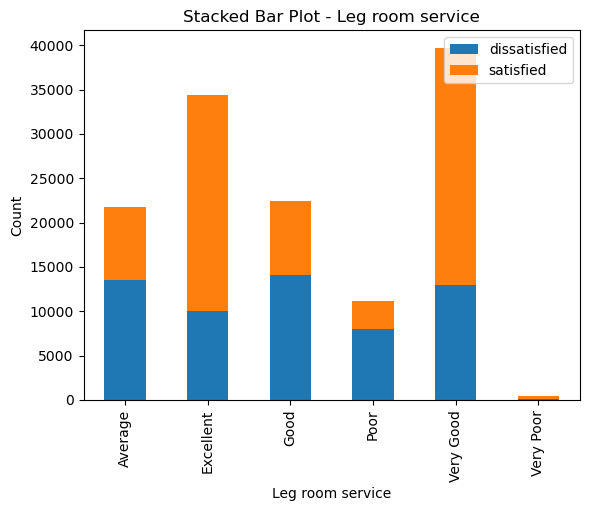

<Figure size 500x400 with 0 Axes>

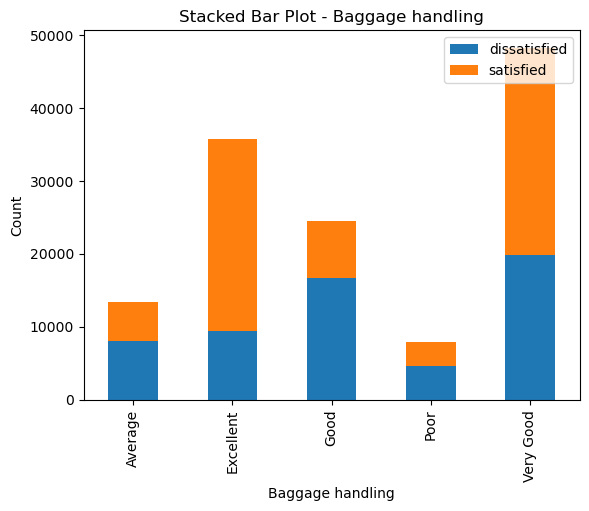

<Figure size 500x400 with 0 Axes>

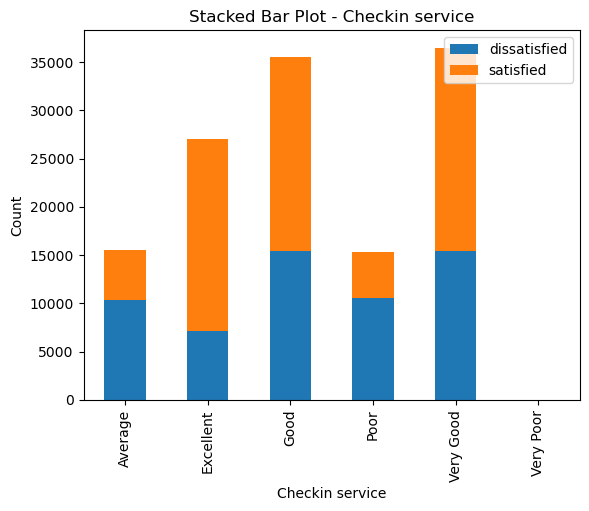

<Figure size 500x400 with 0 Axes>

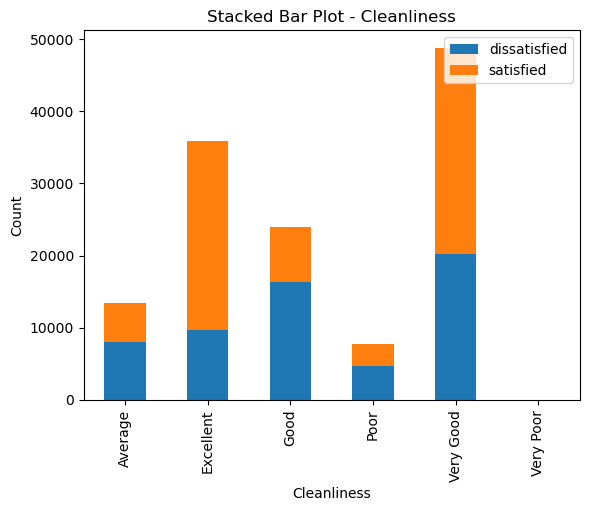

<Figure size 500x400 with 0 Axes>

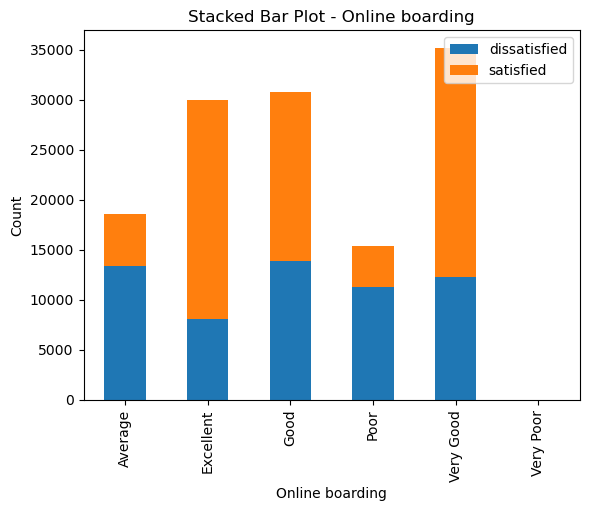

In [42]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object'])

# Plot stacked bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(5, 4))
    stacked_data = data.groupby([column, 'satisfaction']).size().unstack()
    stacked_data.plot(kind='bar', stacked=True)
    plt.title(f"Stacked Bar Plot - {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.show()

In [43]:
Gender_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Gender']])
Gender_satisfaction

Gender,Female,Male
satisfaction,,
dissatisfied,22971,35822
satisfied,42928,28159


In [44]:
Customer_Type_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Customer Type']])
Customer_Type_satisfaction

Customer Type,Loyal Customer,disloyal Customer
satisfaction,,
dissatisfied,40713,18080
satisfied,65387,5700


In [45]:
Type_of_Travel_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Type of Travel']])
Type_of_Travel_satisfaction

Type of Travel,Business travel,Personal Travel
satisfaction,,
dissatisfied,37337,21456
satisfied,52356,18731


In [46]:
Type_of_Travel_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Type of Travel']])
Type_of_Travel_satisfaction

Type of Travel,Business travel,Personal Travel
satisfaction,,
dissatisfied,37337,21456
satisfied,52356,18731


In [47]:
Class_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Class']])
Class_satisfaction

Class,Business,Eco,Eco Plus
satisfaction,,,
dissatisfied,18065,35336,5392
satisfied,44095,22973,4019


In [48]:
Seat_comfort_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Seat comfort']])
Seat_comfort_satisfaction

Seat comfort,Comfortable,Extremely Comfortable,Neutral,Uncomfortable,Very Comfortable,Very Uncomfortable
satisfaction,,,,,,
dissatisfied,18794,141,18454,11503,9891,10
satisfied,10389,17686,10272,9446,18507,4787


In [49]:
Departure_Arrival_time_convenient_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Departure/Arrival time convenient']])
Departure_Arrival_time_convenient_satisfaction

Departure/Arrival time convenient,Convenient,Extremely Convenient,Inconvenient,Neutral,Very Convenient,Very Inconvenient
satisfaction,,,,,,
dissatisfied,10678,11893,8617,10482,14070,3053
satisfied,12506,14924,12211,12312,15523,3611


In [50]:
Food_and_drink_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Food and drink']])
Food_and_drink_satisfaction

Food and drink,Average,Excellent,Good,No Food or Drink,Poor,Very Good
satisfaction,,,,,,
dissatisfied,15406,4473,16088,1312,10361,11153
satisfied,11740,15874,12062,4633,10715,16063


In [51]:
Gate_location_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Gate location']])
Gate_location_satisfaction

Gate location,Average,Excellent,Good,Poor,Very Good,Very Poor
satisfaction,,,,,,
dissatisfied,10295,6599,18012,8778,15109,0
satisfied,14223,12562,15534,13787,14979,2


In [52]:
Inflight_wifi_service_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Inflight wifi service']])
Inflight_wifi_service_satisfaction

Inflight wifi service,Average,Excellent,Good,No Wifi Service,Poor,Very Good
satisfaction,,,,,,
dissatisfied,13464,9536,13535,73,10762,11423
satisfied,13581,19294,14067,59,3949,20137


In [53]:
Inflight_entertainment_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Inflight entertainment']])
Inflight_entertainment_satisfaction

Inflight entertainment,Average,Excellent,Good,No Entertainment,Poor,Very Good
satisfaction,,,,,,
dissatisfied,15912,1430,19385,1012,9325,11729
satisfied,3271,28401,4815,1966,2484,30150


In [54]:
Online_support_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Online support']])
Online_support_satisfaction

Online support,Average,Excellent,Good,No Online Support,Poor,Very Good
satisfaction,,,,,,
dissatisfied,12141,8066,15499,1,9824,13262
satisfied,5119,27497,6110,0,4113,28248


In [55]:
Ease_of_Online_booking_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Ease of Online booking']])
Ease_of_Online_booking_satisfaction

Ease of Online booking,Average,Difficult,Easy,Extremely Easy,Very Difficult,Very Easy
satisfaction,,,,,,
dissatisfied,14240,10844,14403,8008,18,11280
satisfied,5711,2592,8015,26129,0,28640


In [56]:
On_board_service_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['On-board service']])
On_board_service_satisfaction

On-board service,Average,Excellent,Good,Poor,Very Good,Very Poor
satisfaction,,,,,,
dissatisfied,11324,7437,15937,9735,14355,5
satisfied,5850,24287,11100,3530,26320,0


In [57]:
Leg_room_service_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Leg room service']])
Leg_room_service_satisfaction

Leg room service,Average,Excellent,Good,Poor,Very Good,Very Poor
satisfaction,,,,,,
dissatisfied,13559,10020,14113,7980,12984,137
satisfied,8186,24365,8354,3161,26714,307


In [58]:
Baggage_handling_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Baggage handling']])
Baggage_handling_satisfaction

Baggage handling,Average,Excellent,Good,Poor,Very Good
satisfaction,,,,,
dissatisfied,8117,9450,16764,4603,19859
satisfied,5315,26298,7721,3372,28381


In [59]:
Checkin_service_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Checkin service']])
Checkin_service_satisfaction

Checkin service,Average,Excellent,Good,Poor,Very Good,Very Poor
satisfaction,,,,,,
dissatisfied,10339,7136,15378,10508,15431,1
satisfied,5147,19869,20160,4861,21050,0


In [60]:
Online_boarding_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Online boarding']])
Online_boarding_satisfaction

Online boarding,Average,Excellent,Good,Poor,Very Good,Very Poor
satisfaction,,,,,,
dissatisfied,13352,8040,13861,11291,12235,14
satisfied,5221,21933,16919,4068,22946,0


In [61]:
Cleanliness_satisfaction = pd.crosstab(index=data['satisfaction'], columns=[data['Cleanliness']])
Cleanliness_satisfaction

Cleanliness,Average,Excellent,Good,Poor,Very Good,Very Poor
satisfaction,,,,,,
dissatisfied,7985,9644,16358,4635,20166,5
satisfied,5427,26272,7626,3133,28629,0


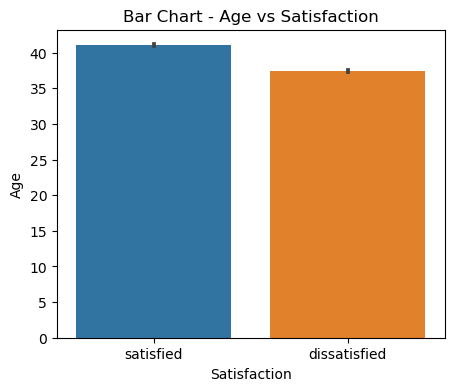

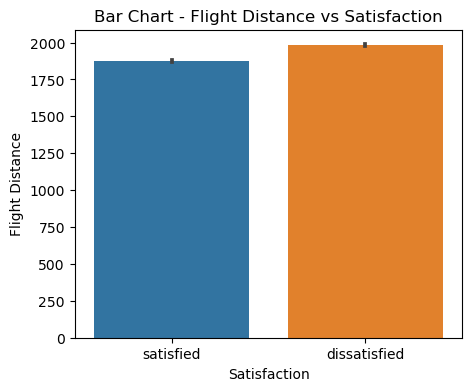

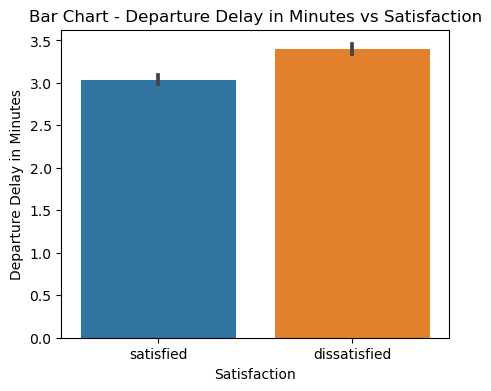

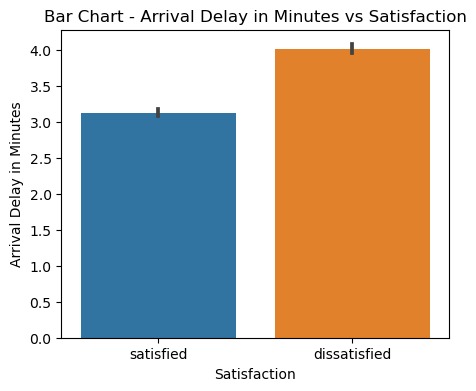

In [62]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Plot bar charts for each numeric column with respect to "satisfaction"
for column in numeric_columns:
    plt.figure(figsize=(5, 4))
    sns.barplot(x='satisfaction', y=column, data=data)
    plt.title(f"Bar Chart - {column} vs Satisfaction")
    plt.xlabel('Satisfaction')
    plt.ylabel(column)
    plt.show()

##### Multivariate Analysis

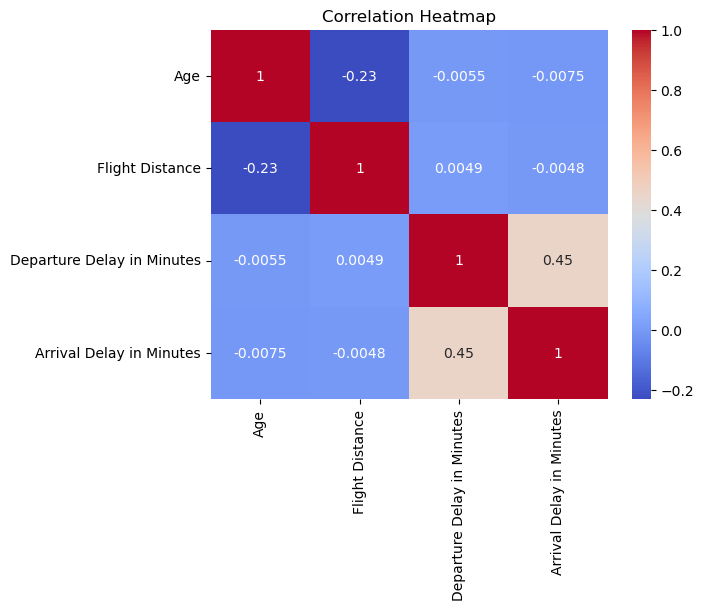

In [63]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### Encoding the Categorical features

In [64]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Average,Easy,Good,Very Poor,Good,Excellent,Good,Average,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Average,Easy,Very Good,Very Good,Very Good,Average,Good,Average,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Average,Average,Good,Good,Very Good,Very Good,Very Good,Average,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Good,Difficult,Poor,Very Poor,Poor,Very Good,Poor,Good,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,Very Uncomfortable,Very Inconvenient,No Food or Drink,...,Very Good,Average,Average,Very Poor,Average,Very Good,Average,Excellent,0,0.0


In [65]:
# Categorical features
data_onehot = data[['satisfaction','Gender','Customer Type','Type of Travel','Class','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']]
#numeric Columns
data_num = data[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [66]:
#OneHotencoding the categorical column
ohe = OneHotEncoder()
ohe.fit_transform(data_onehot).toarray()

#assigning them to a a dataframe
data_cat1 = pd.DataFrame(ohe.fit_transform(data_onehot).toarray(), columns= ohe.get_feature_names_out())
data_cat1.head()

,satisfaction_dissatisfied,satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,...,Cleanliness_Good,Cleanliness_Poor,Cleanliness_Very Good,Cleanliness_Very Poor,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Online boarding_Very Poor
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
data_cat1.columns

Index(['satisfaction_dissatisfied', 'satisfaction_satisfied', 'Gender_Female',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Seat comfort_Comfortable',
       'Seat comfort_Extremely Comfortable', 'Seat comfort_Neutral',
       'Seat comfort_Uncomfortable', 'Seat comfort_Very Comfortable',
       'Seat comfort_Very Uncomfortable',
       'Departure/Arrival time convenient_Convenient',
       'Departure/Arrival time convenient_Extremely Convenient',
       'Departure/Arrival time convenient_Inconvenient',
       'Departure/Arrival time convenient_Neutral',
       'Departure/Arrival time convenient_Very Convenient',
       'Departure/Arrival time convenient_Very Inconvenient',
       'Food and drink_Average', 'Food and drink_Excellent',
       'Food and drink_Good', 'Food and drink_No Food or Drink',
       '

In [68]:
#dropping the dummy columns
data_cat1 = data_cat1.drop(columns=['satisfaction_dissatisfied', 'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco Plus','Seat comfort_Very Uncomfortable','Departure/Arrival time convenient_Very Inconvenient','Food and drink_Very Good','Gate location_Very Poor','Inflight wifi service_Very Good','Inflight entertainment_Poor','Online support_Poor','Ease of Online booking_Very Difficult','On-board service_Poor','Leg room service_Poor','Baggage handling_Poor','Checkin service_Very Poor','Cleanliness_Very Poor','Online boarding_Very Poor'])
data_cat1.head()

,satisfaction_satisfied,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,...,Cleanliness_Average,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Poor,Cleanliness_Very Good,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
#renamimg the columns
data_cat1.rename(columns={'satisfaction_satisfied': 'Satisfaction'}, inplace=True)
data_cat1.rename(columns={'Gender_Female': 'Gender'}, inplace=True)
data_cat1.rename(columns={'Customer Type_Loyal Customer': 'Customer_Type'}, inplace=True)
data_cat1.rename(columns={'Type of Travel_Business travel': 'Type_of_Travel'}, inplace=True)
data_cat1.head()

,Satisfaction,Gender,Customer_Type,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,...,Cleanliness_Average,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Poor,Cleanliness_Very Good,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
#concating the encoded feature dataframes and numeric columns
df = pd.concat([data_cat1, data_num], axis=1)
df.head()

,Satisfaction,Gender,Customer_Type,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,...,Cleanliness_Very Good,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,65,265,0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,47,2464,0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,15,2138,0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,60,623,0,0.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,70,354,0,0.0


In [71]:
# features and label
# features and label
y = df['Customer_Type']
X = df.drop(columns='Customer_Type')

In [72]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90916, 78), (38964, 78), (90916,), (38964,))

In [73]:
X_train.head()

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Cleanliness_Very Good,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
18386,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,40,1586,4,1.0
115613,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,49,1974,0,0.0
68138,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,21,1925,0,1.0
78244,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,54,1471,4,6.0
34472,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,68,1905,6,0.0


In [74]:
#initializing and fitting the model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [75]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(coefficients)
print(intercept)

[[ 1.61213485e+00 -6.09404491e-01 -3.71070963e+00 -2.24327547e-02
  -6.20589570e-01  1.43563172e-01 -1.04274251e-01  1.47540424e-01
   4.28994629e-02 -3.22827099e-01 -9.92071232e-03  8.63423886e-01
   1.97649282e-01 -1.53116951e-01  3.58980901e-01 -1.10199216e-01
   1.74010627e-01 -2.07640041e-02 -4.61225481e-02 -1.09630039e-02
   2.23175631e-01  5.12418143e-01 -5.96450264e-01  1.77775691e-01
  -4.76769273e-01  3.42643773e-01 -2.19634248e-01  1.46730934e-01
  -1.15349868e-03 -2.59642315e-01 -3.31437370e-01  5.53561814e-01
  -1.36706323e-01 -2.04644928e-01  5.06223202e-01 -1.31822843e-01
   4.26830638e-02  9.39844441e-02  6.00236847e-05  4.04076874e-01
   6.88946296e-02 -3.66845039e-01  1.39000935e-02 -5.72768842e-02
   1.78541890e-01  2.04361104e-01 -6.12575484e-02 -2.62974489e-01
  -1.18531748e-02  3.93003410e-04 -2.23145646e-01  7.69867325e-03
  -1.67645861e-01  2.62850980e-01  2.39582127e-02  2.99006513e-01
  -4.22765530e-01  2.22432475e-01 -3.34800289e-01  1.50379822e-01
  -2.64400

###### Train dataset

In [76]:
#predecting the train probability
train_prob = model.predict_proba(X_train)
train_prob

array([[0.00447492, 0.99552508],
       [0.05724421, 0.94275579],
       [0.92927519, 0.07072481],
       ...,
       [0.00876608, 0.99123392],
       [0.10415365, 0.89584635],
       [0.57087184, 0.42912816]])

In [77]:
#assigning the expected probablities to the datset
X_train['P[y=1]'] = model.predict_proba(X_train)[:, 1]
X_train

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,P[y=1]
18386,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,40,1586,4,1.0,0.995525
115613,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,49,1974,0,0.0,0.942756
68138,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,21,1925,0,1.0,0.070725
78244,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,54,1471,4,6.0,0.820303
34472,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,68,1905,6,0.0,0.999305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128106,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,42,1710,0,0.0,0.919609
103694,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,51,2148,0,0.0,0.990756
860,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,64,1206,13,9.0,0.991234
15795,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,22,1193,0,0.0,0.895846


In [78]:
#predecting the class
threshold = 0.5
X_train['Class'] = np.where(X_train['P[y=1]'] > threshold, 1, 0)
X_train.head()

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,P[y=1],Class
18386,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,40,1586,4,1.0,0.995525,1
115613,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,49,1974,0,0.0,0.942756,1
68138,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,21,1925,0,1.0,0.070725,0
78244,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,54,1471,4,6.0,0.820303,1
34472,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,68,1905,6,0.0,0.999305,1


In [79]:
#calculating the likelihood
X_train['likelihood'] = ((X_train['P[y=1]'])*(X_train['Class']))+((1-(X_train['P[y=1]']))*(1-(X_train['Class'])))
X_train

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,P[y=1],Class,likelihood
18386,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40,1586,4,1.0,0.995525,1,0.995525
115613,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,49,1974,0,0.0,0.942756,1,0.942756
68138,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,21,1925,0,1.0,0.070725,0,0.929275
78244,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,54,1471,4,6.0,0.820303,1,0.820303
34472,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,68,1905,6,0.0,0.999305,1,0.999305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128106,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,42,1710,0,0.0,0.919609,1,0.919609
103694,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,51,2148,0,0.0,0.990756,1,0.990756
860,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,64,1206,13,9.0,0.991234,1,0.991234
15795,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,22,1193,0,0.0,0.895846,1,0.895846


In [80]:
#calculating the log likelihood
X_train['LL'] = np.log(X_train['likelihood'])
X_train.head()

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,P[y=1],Class,likelihood,LL
18386,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40,1586,4,1.0,0.995525,1,0.995525,-0.004485
115613,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,49,1974,0,0.0,0.942756,1,0.942756,-0.058948
68138,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,21,1925,0,1.0,0.070725,0,0.929275,-0.073350
78244,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,54,1471,4,6.0,0.820303,1,0.820303,-0.198082
34472,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,68,1905,6,0.0,0.999305,1,0.999305,-0.000696


In [81]:
#calculating the MLE
train_MLE = sum(X_train['LL'])
train_MLE

-12580.38729721852

In [82]:
# Initialize empty dataframe to store metrics
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [83]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (X_train['P[y=1]'] > threshold).astype(int)
    cm = confusion_matrix(y_train, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)

In [84]:
df_ROC

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,74317.0,0.0,16599.0,0.0,1.000000,1.000000
1,0.1,74089.0,2362.0,14237.0,228.0,0.996932,0.857702
2,0.2,73593.0,4941.0,11658.0,724.0,0.990258,0.702331
3,0.3,72911.0,6953.0,9646.0,1406.0,0.981081,0.581119
4,0.4,71920.0,8671.0,7928.0,2397.0,0.967746,0.477619
5,0.5,70598.0,10202.0,6397.0,3719.0,0.949958,0.385385
6,0.6,68708.0,11600.0,4999.0,5609.0,0.924526,0.301163
7,0.7,65919.0,12889.0,3710.0,8398.0,0.886998,0.223507
8,0.8,61518.0,14121.0,2478.0,12799.0,0.827778,0.149286
9,0.9,52697.0,15275.0,1324.0,21620.0,0.709084,0.079764


In [85]:
# Compute AUC
auc = roc_auc_score(y_train, X_train['P[y=1]'])
auc

0.913533618909582

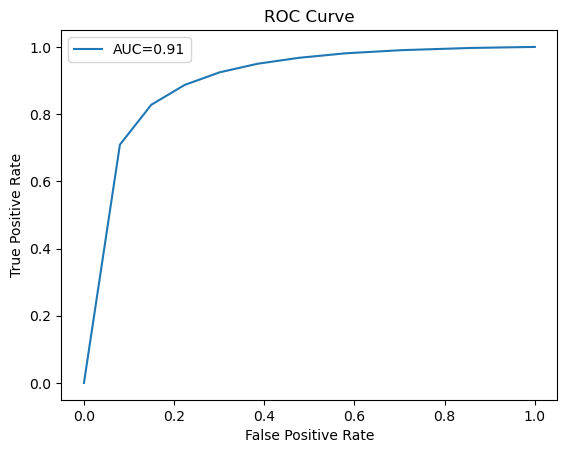

In [86]:
# Plot ROC curve from df_ROC
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### Test Dataset

In [87]:
X_test.head()

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Cleanliness_Very Good,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
103044,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,59,1470,7,0.0
43282,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,22,1771,0,0.0
65543,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,55,3657,12,8.0
65083,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,41,1796,0,0.0
76496,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,42,1709,0,0.0


In [88]:
#predecting the test probability
test_prob = model.predict_proba(X_test)
test_prob

array([[1.74922225e-02, 9.82507777e-01],
       [8.71362459e-01, 1.28637541e-01],
       [5.58220045e-04, 9.99441780e-01],
       ...,
       [2.91670871e-01, 7.08329129e-01],
       [8.49458771e-01, 1.50541229e-01],
       [5.65487269e-03, 9.94345127e-01]])

In [89]:
#assigning the expected probablities to the datset
X_test['P[y=1]'] = model.predict_proba(X_test)[:, 1]
X_test

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Online boarding_Average,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,P[y=1]
103044,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,59,1470,7,0.0,0.982508
43282,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,22,1771,0,0.0,0.128638
65543,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,55,3657,12,8.0,0.999442
65083,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,41,1796,0,0.0,0.978211
76496,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,42,1709,0,0.0,0.624525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32347,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,21,1491,0,0.0,0.783090
123061,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,38,2372,21,7.0,0.926249
74700,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,32,3479,0,0.0,0.708329
54997,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,32,2302,9,7.0,0.150541


In [90]:
#predecting the class
threshold = 0.5
X_test['Class'] = np.where(X_test['P[y=1]'] > threshold, 1, 0)
X_test.head()

,Satisfaction,Gender,Type_of_Travel,Class_Business,Class_Eco,Seat comfort_Comfortable,Seat comfort_Extremely Comfortable,Seat comfort_Neutral,Seat comfort_Uncomfortable,Seat comfort_Very Comfortable,...,Online boarding_Excellent,Online boarding_Good,Online boarding_Poor,Online boarding_Very Good,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,P[y=1],Class
103044,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,59,1470,7,0.0,0.982508,1
43282,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,22,1771,0,0.0,0.128638,0
65543,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,55,3657,12,8.0,0.999442,1
65083,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,41,1796,0,0.0,0.978211,1
76496,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42,1709,0,0.0,0.624525,1


In [91]:
# Initialize empty dataframe to store metrics
df_ROC_test = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [92]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (X_test['P[y=1]'] > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC_test = df_ROC_test.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)

In [93]:
df_ROC_test

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,31783.0,0.0,7181.0,0.0,1.000000,1.000000
1,0.1,31679.0,1009.0,6172.0,104.0,0.996728,0.859490
2,0.2,31476.0,2107.0,5074.0,307.0,0.990341,0.706587
3,0.3,31165.0,2996.0,4185.0,618.0,0.980556,0.582788
4,0.4,30760.0,3747.0,3434.0,1023.0,0.967813,0.478206
5,0.5,30229.0,4435.0,2746.0,1554.0,0.951106,0.382398
6,0.6,29416.0,5028.0,2153.0,2367.0,0.925526,0.299819
7,0.7,28215.0,5596.0,1585.0,3568.0,0.887739,0.220721
8,0.8,26302.0,6091.0,1090.0,5481.0,0.827549,0.151789
9,0.9,22589.0,6579.0,602.0,9194.0,0.710726,0.083832


In [94]:
# Compute AUC
auc = roc_auc_score(y_test, X_test['P[y=1]'])
auc

0.9126313905855183

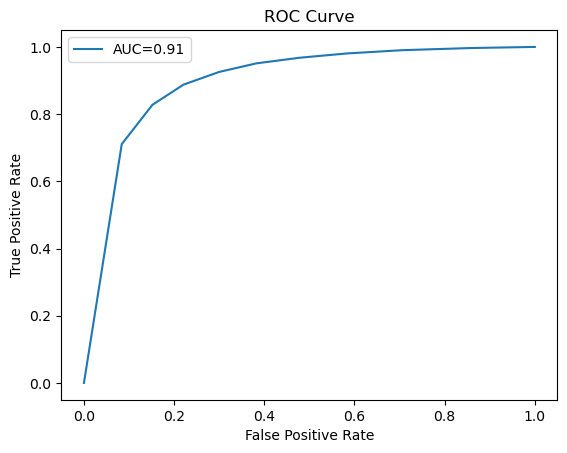

In [95]:
# Plot ROC curve from df_ROC
plt.plot(df_ROC_test['FPR'], df_ROC_test['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### Saving the model

In [96]:
import pickle

In [97]:
file_name = 'trained_model.sav'

In [98]:
pickle.dump(model, open(file_name,'wb'))

##### loading the save model

In [100]:
load_model = pickle.load(open('trained_model.sav','rb'))

In [107]:
#creating the input data
input_data = (1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,25,2020,10,15)
#converting the input_data into an array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predecting for on e instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#predecting
prediction = load_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('The person is DisLoyal Customer')
else:
    print('The person is Loyal Customer')

[1.]
The person is Loyal Customer
